# Demo: 4.1: Plotting with Seaborn

This notebook demonstrates how to use the Seaborn plotting package to visualize data.  The built-in Seaborn dataset, ```mpg```, will be used to demonstrate the plotting capabilities of Seaborn. Specifically, we will demonstrate how to create scatter plots and a correlation heatmap.

- **Demonstrates**: 
    - How to create scatter plots with Seaborn
    - How to create a correlation heatmap with Seaborn

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

The seaborn package contains some sample datasets that can be loaded using the ```sns.load_dataset``` function. We're going to load the dataset named ```mpg```, which contains information about different car models and how their mpg rating (miles per gallon) relates to other vehicle characteristics.

### Step 1.

* Load the "mpg" dataset from sns and assign it to the variable ```mpg```.  This loads the data into a pandas dataframe.  Take a peek at the data using the ```head()``` method. 

In [4]:
mpg = sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


* As you can see, one of the columns in the dataframe is the "name" of the car, which combines information about both the make (manufacturer) of the car, and the model.

* Execute the code cell below and then take another peek using the ```head``` method to verify that a new column called "make" has been added to the dataframe. This is achieved by applying the lambda function to each row of the "name" column and storing the result in the new column "make".

In [5]:
mpg['make'] = mpg['name'].apply(lambda s: s.split()[0])
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,make
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford


### Step 2.

The ```sns.relplot``` function makes scatterplots between pairs of datasets, like the ```plt.scatter``` function in matplotlib, but is focused more on data in dataframes, allowing for more than two data columns to be represented in a scatterplot.  
* Use ```sns.relplot``` to make a scatterplot of the "horsepower" (on the x-axis)  vs. "mpg" (on the y-axis) columns of the mpg dataframe. To do this you will need to specify the arguments ```x``` and ```y``` with the strings that correspond to the variable names and the argument ```data``` with the source data frame. You should notice that there is generally an inverse relationship between the two: cars with higher horsepower tend to get lower gas mileage (mpg).


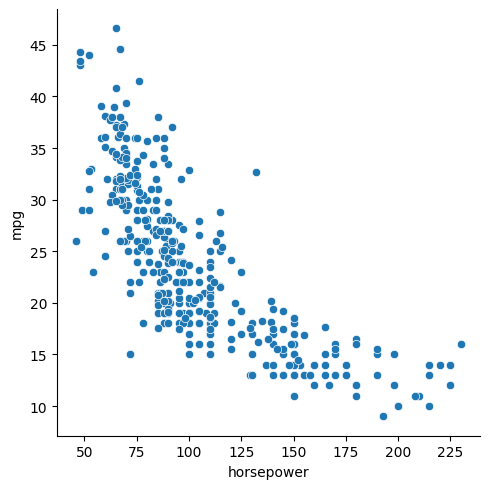

In [8]:
sns.relplot(data=mpg, x='horsepower', y='mpg')

### Step 3.

As noted, the ```sns.relplot``` function can be called with additional options to overlay other data onto the basic scatterplot that relplot provides.  For example, the ```hue``` option can be passed with another column name in the dataframe, and points in the scatterplot are colored according to a heatmap applied to the specified column ("hue" is a synonym for "color").

* Use ```sns.relplot``` to make a scatterplot of the "mpg" vs. "horsepower" columns of the mpg dataframe, but now color the data points according to the model year using the `hue` option. Notice that there is a systematic trend with model_year, as high-horsepower / low-mpg cars are replaced by lower-horsepower / high-mpg cars. This was generally in response to increased fuel prices and gas shortages during the 1970s.



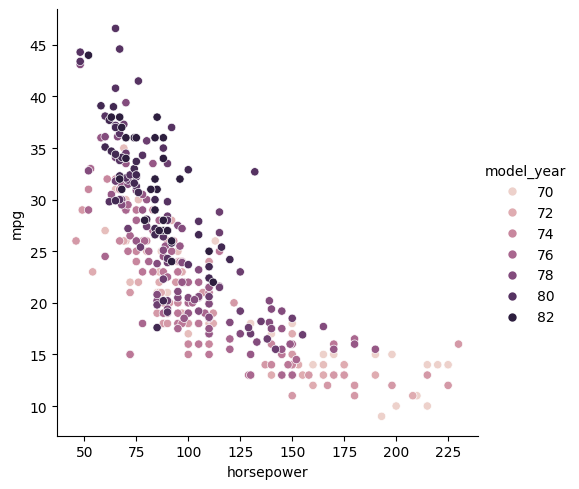

In [9]:
sns.relplot(data=mpg, x='horsepower', y='mpg', hue="model_year")

---

### Step 4. Pairwise data relationships

 It is often useful to be able to visualize all pairwise data relationships in a dataset containing multiple columns.  Fortunately, seaborn provides a convenient function for summarizing such relationships.

Before making such a plot, however, it will be useful to clean up the ```mpg``` dataframe a little bit, since there is a small amount of missing data.  Specifically, examine the output of ```mpg.info()``` in the code cell below (execute the code cell to view the output).  You should notice that while most data columns contain 398 non-null entries, the horsepower column contains only 392.  We were able to make the scatterplots above even with the missing horsepower data, but the absence of those data will generate some warnings in the plots below.

In [10]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
 9   make          398 non-null    object 
dtypes: float64(4), int64(3), object(3)
memory usage: 31.2+ KB


Use the ```dropna()``` method on the dataframe to remove those rows where we are missing some data.  The option ```inplace=True``` instructs the method to modify the mpg dataframe as is, rather than generating a new dataframe that we must assign to a variable.  Execute the code cell below.

In [11]:
mpg.dropna(inplace=True)

### Pairwise data correlations

* For a given dataframe, the ```corr()``` method computes the pairwise correlation of the columns of the dataframe, e.g., ```mpg.corr()``` for our mpg dataset.  Each pair of columns in the dataframe, corresponding to one of the scatterplots in the figure above, is replaced by a single number, ranging from 1.0 if the two columns are perfectly correlated to -1.0 if the columns are perfectly anti-correlated.
* The ```sns.heatmap``` function plots rectangular data as a color-encoded matrix.  Because we can use the ```mpg.corr()``` method to compute the correlation for each pair of columns, we can use the ```sns.heatmap``` function to plot those correlations.


### Step 5.

* Use the ```corr()``` method to compute pairwise correlations of the mpg columns, and assign that to a variable named ```mpg_corr```.  
* Examine the new dataframe ```mpg_corr``` by entering and executing the expression ```mpg_corr```.  (Alternatively, you could enter ```print(mpg_corr)```, but as we've seen previously, dataframes are rendered more nicely in Jupyter notebooks when we examine them directly rather than running them through the ```print``` function.)
* You should notice that the index and columns of ```mpg_corr``` are the same, since they reflect all pairwise combinations of columns in the original ```mpg``` dataset, resulting in a 2D matrix of correlations.  All the correlations on the diagonal are equal to 1, since each column is perfectly correlated with itself, and the correlation matrix is symmetric about the diagonal since correlation between two datasets is independent of the order in which we consider them.

In [12]:
mpg_corr = mpg.corr(numeric_only=True)
mpg_corr


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000


### Step 6.

* Use the ```sns.heatmap``` function to plot the pairwise correlations by passing ```mpg_corr``` as an argument to the heatmap function.  In addition, the heatmap function has an optional argument ```annot```, and if that is set to ```True```, each cell of the heatmap is annotated by the numerical value in that cell (as well as being color-coded by the heatmap). Include the option ```annot=True``` in your function call to include those numerical values.
* Examine the resulting heatmap, and visually confirm that some of the correlations/anti-correlations that you observed in the pairwise scatterplots are reflected in the correlation heatmap. You should notice that the annotated number in each cell corresponds to the data you examined in ```mpg_corr``` above (although rounded to fewer decimal places).

You can find examples of ```sns.heatmap``` and the application of the optional  ```annot``` argument in the <a href="https://seaborn.pydata.org/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap">seaborn.heatmap</a> documentation.

<Axes: >

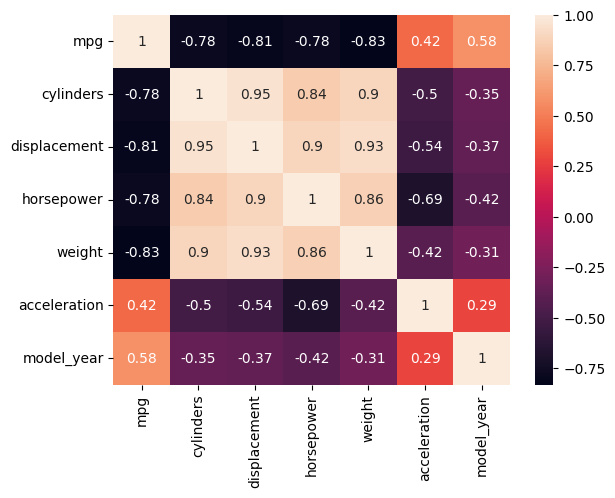

In [13]:
sns.heatmap(mpg_corr, annot=True)